# <FONT COLOR='red'>**_OVERALL DESCRIPTION_**</FONT>

---
---

El propósito de este cuaderno realizar la creación de las gráficas presentadas en el artículo "Classifying Flows in Software-Defined Data Center Networks by Encoder-Only"

## <FONT COLOR = 'gray'>**IMPORT GRAPHIC LIBRARIES**</FONT>

---

Next, we need import some libraries to create graphics.
1. `import matplotlib.pyplot as plt`: Python plotting library, `pyplot` is a module of `matplotlib` that provides a MATLAB-like interface for creating plots. It allows you to create a wide variety of graphs such as line, bar, scatter, histograms, among others. Generally renamed to `plt` for ease of use in code.

## <FONT COLOR = 'gray'>**IMPORT DATA ANALYSIS LIBRARIES**</FONT>

---

Next, we need import some libraries to data analysis graphics.
1. `import pandas as pd`: An essential component for data analysis and manipulation in Python, it provides data structures such as Series (one-dimensional) and DataFrames (two-dimensional) that allow you to handle tabular data with ease.
2. `import numpy as np`:Fundamental component for numerical computation in Python, as it provides support for multidimensional arrays and matrices, as well as a large collection of mathematical functions to operate on these arrays.

In [ ]:
# IMPORT GRAPHIC LIBRARIES
import matplotlib.pyplot as plt

# IMPORT DATA ANALYSIS LIBRARIES
import pandas as pd
import numpy as np

In [ ]:
# RNN DATASET ID
id = '1-sUJTEAB5pV-imoiaye_YG06TFAPp6sE'

# GENERATE THE DOWNLOAD URL
url_gnu = f'https://drive.google.com/uc?id={id}'

# DOWNLOAD AND LOAD UNI1 DATASET IN A DATAFRAME OF PANDAS
gnu = pd.read_csv(url_gnu)

# ADD A COLUMN FOR EPHOCH AND DELETE UNNECESSARY COLUMNS.
gnu.insert(loc = 0, column = 'Epoch', value = range(1, len(gnu) + 1))
gnu.drop(labels=['accuracy','precision','f1_score'], axis=1, inplace=True)

In [ ]:
# REPLICATION OF CIEF-BERT EPOCH TRAINING RESULTS
cief = pd.DataFrame({
    'loss': [0.422200,0.175600,0.102100],
    'val_loss':[0.392955,0.152791,0.097802],
    'val_accuracy': [0.820365,0.950149,0.971384],
    'val_precision':[0.677592,0.884501,0.934478],
    'val_f1_score':[0.784601,0.932898,0.960381]
})

# KEEP THE LAST RESULT.
last_values = cief.iloc[-1]

# GENERATION OF REPLICAS OF THE LAST RECORD TO REACH THE 50 EPOS OF THE RNN TRAINING
missing_data = pd.DataFrame({col: [last_values[col]] * (50 - len(cief)) for col in cief.columns})
cief = pd.concat([cief, missing_data], ignore_index=True)

# ADD A COLUMN FOR EPHOCH
cief.insert(loc = 0, column = 'Epoch', value = range(1, len(cief) + 1))

In [ ]:
# CREATION OF THE DATA SET FOR THE COMPARISON OF THE EVALUATION RESULTS OF THE MODELS.
models = pd.DataFrame({
    'Accuracy': [0.9624, 0.8904, 0.9584, 0.9714],
    'Precision': [0.9778, 0.9779, 0.9104, 0.9345],
    'F1-Score': [0.9447, 0.8075, 0.9429, 0.9604]
}, index=['XGBoost', 'RNN','NELLY-ARF', 'CIEF-BERT'])

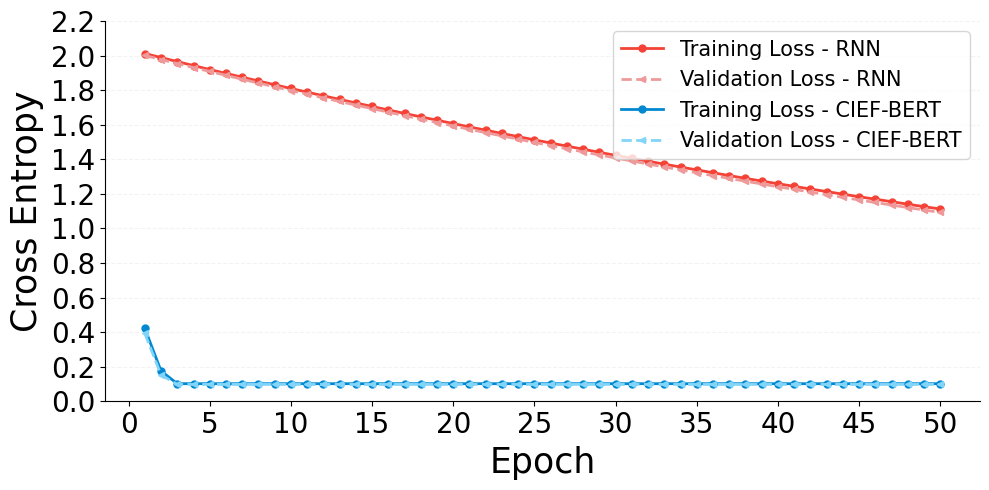

In [ ]:
## LOSS COMPARISON FIGURE ##

# FIGURE CREATION
plt.figure(figsize=(10,5))

# RNN LOSS
plt.plot(gnu['Epoch'], gnu['loss'], label=f'Training Loss - RNN', color='#F44336', marker='o', linewidth=2, markersize=5)
plt.plot(gnu['Epoch'], gnu['val_loss'], label=f'Validation Loss - RNN', color='#EF9A9A', marker='<', linestyle='dashed', linewidth=2, markersize=5)

# CIEF-BERT LOSS
plt.plot(cief['Epoch'], cief['loss'], label=f'Training Loss - CIEF-BERT', color='#0288D1', marker='o', linewidth=2, markersize=5)
plt.plot(cief['Epoch'], cief['val_loss'], label=f'Validation Loss - CIEF-BERT', color='#81D4FA', marker='<', linestyle='dashed', linewidth=2, markersize=5)

# LABELS
plt.xlabel('Epoch', fontsize=25, labelpad=5)
plt.ylabel('Cross Entropy', fontsize=25, labelpad=5)

# AXES SIZE ADJUSTMENT
maximo = max(max(max(gnu['loss']), max(gnu['val_loss'])),max(max(cief['loss']), max(cief['val_loss'])))
plt.yticks(np.arange(0, maximo+0.2, 0.2), fontsize=20)
plt.xticks(np.arange(0, max(len(gnu), len(cief)) + 1, 5), fontsize=20)

# HORIZONTAL GRID CONFIGURATION
plt.grid(axis='y', linestyle='--', alpha=0.15)

# REMOVE TOP AND RIGHT BORDER
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# LEGEND
plt.legend(fontsize=15, loc='upper right')

# SAVE FIGURE
plt.savefig('cros_entropy.eps', format='eps', bbox_inches='tight', pad_inches=0.1)

# PERFORMANCE
plt.tight_layout()
plt.show()
plt.close()

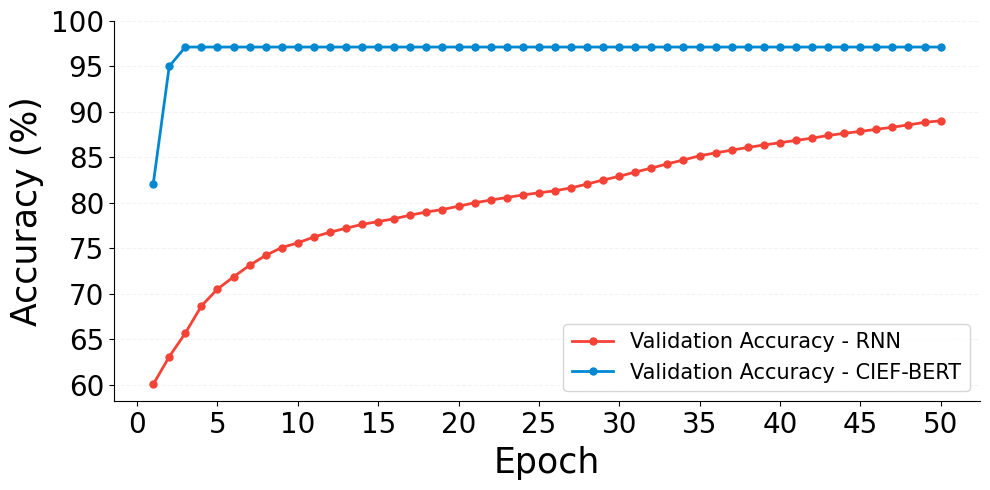

In [ ]:
## ACCURACY COMPARISON FIGURE ##

# FIGURE CREATION
plt.figure(figsize=(10, 5))

# RNN ACCURACY
plt.plot(gnu['Epoch'], gnu['val_accuracy'] * 100, label='Validation Accuracy - RNN', color='#F44336', marker='o', linewidth=2, markersize=5)

# CIEF-BERT ACCURACY
plt.plot(cief['Epoch'], cief['val_accuracy'] * 100, label='Validation Accuracy - CIEF-BERT', color='#0288D1', marker='o', linewidth=2, markersize=5)

# LABELS
plt.xlabel('Epoch', fontsize=25, labelpad=5)
plt.ylabel('Accuracy (%)', fontsize=25, labelpad=5)

# AXES SIZE ADJUSTMENT
minimo = ((round(min(min(gnu['val_accuracy']), min(cief['val_accuracy'])), 4) * 100) - ((round(min(min(gnu['val_accuracy']), min(cief['val_accuracy'])), 4) * 100) % 5))
plt.yticks(np.arange(minimo, 101, 5), fontsize=20)
plt.xticks(np.arange(0, max(len(gnu), len(cief)) + 1, 5), fontsize=20)

# HORIZONTAL GRID CONFIGURATION
plt.grid(axis='y', linestyle='--', alpha=0.15)

# REMOVE TOP AND RIGHT BORDER
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# LEGEND
plt.legend(fontsize=15)

# SAVE FIGURE
plt.savefig('accuracy.eps', format='eps', bbox_inches='tight', pad_inches=0.1)

# PERFORMANCE
plt.tight_layout()
plt.show()
plt.close()

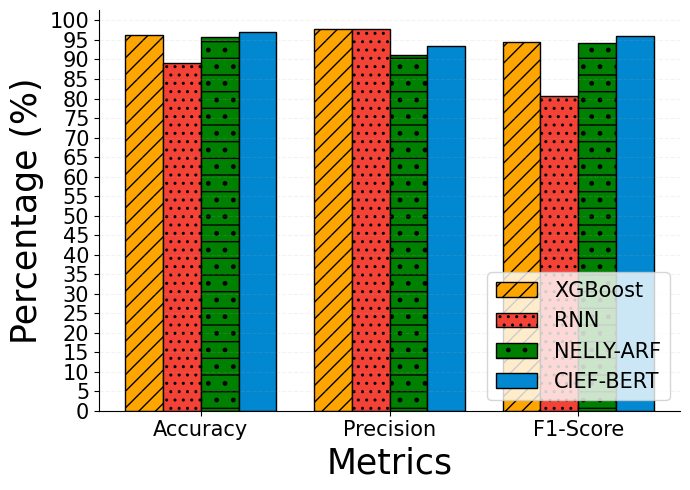

In [ ]:
## PERFORMANCE COMPARISON FIGURE ##

# FIGURE PARAMETERS
label_fontsize = 25
tick_fontsize = 15
bar_width = 0.2
index = range(len(models.columns))

# FIGURE CREATION
fig, ax = plt.subplots(figsize=(7,5))

# XGBoost BARS
xgboost = ax.bar([i - 3*bar_width / 2 for i in index], models.loc['XGBoost']*100, bar_width, label='XGBoost', hatch='//', edgecolor='black', color='orange')

# RNN BARS
rnn = ax.bar([i - bar_width / 2 for i in index], models.loc['RNN']*100, bar_width, label='RNN', hatch='..', edgecolor='black', color='#F44336')

# NELLY BARS
nelly = ax.bar([i + bar_width/2 for i in index], models.loc['NELLY-ARF']*100, bar_width, label='NELLY-ARF', hatch='.-', edgecolor='black', color='green')

# CIEF-BERT BARS
cief_bert = ax.bar([i + 3*bar_width / 2 for i in index], models.loc['CIEF-BERT']*100, bar_width, label='CIEF-BERT', edgecolor='black', color='#0288D1')

# LABELS
ax.set_xlabel('Metrics', fontsize=label_fontsize)
ax.set_ylabel('Percentage (%)', fontsize=label_fontsize)

# AXES SIZE ADJUSTMENT
ax.set_xticks(index)
ax.set_xticklabels(models.columns, fontsize=tick_fontsize)
ax.set_yticks(range(0, 101, 5))
ax.set_yticklabels([f'{i}' for i in range(0, 101, 5)], fontsize=tick_fontsize)

# HORIZONTAL GRID CONFIGURATION
ax.yaxis.grid(True, linestyle='--', alpha=0.15)

# REMOVE TOP AND RIGHT BORDER
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# LEGEND
ax.legend(fontsize=15, loc='lower right')

# SAVE FIGURE
plt.savefig('models_comparation.eps', format='eps', bbox_inches='tight', pad_inches=0.1)

# PERFORMANCE
plt.tight_layout()
plt.show()
plt.close()